In [1]:
import csv
import mysql

ModuleNotFoundError: No module named 'mysql'

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="jeremy",
    password="Mysql.003",
    database="prompt_bi_db"
)

cursor = conn.cursor()

with open('./datasets/shopping_behavior_updated.csv', 'r') as file:
    csv_data = csv.reader(file)
    next(csv_data)  # skip header

    for row in csv_data:
        cursor.execute("""
            INSERT INTO your_table (col1, col2, col3)
            VALUES (%s, %s, %s)
        """, row)

conn.commit()
cursor.close()
conn.close()

print("CSV imported successfully!")


AttributeError: module 'mysql' has no attribute 'connector'

In [9]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# --- 1. Load your CSV file into a DataFrame ---
df = pd.read_csv("./datasets/shopping_behavior_updated.csv")

# --- 2. Create a MySQL connection engine ---
username = "jeremy"
password = "Mysql.003"
host = "localhost"
database = "prompt_bi_db"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# --- 3. Save to MySQL table ---
df.to_sql(
    name="shopping",
    con=engine,
    if_exists="append",   # or "replace"
    index=False
)

print("CSV successfully saved to MySQL!")

CSV successfully saved to MySQL!


In [3]:
%load_ext sql

In [4]:
%sql mysql+pymysql://{username}:{password}@{host}/{database}

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [24]:
%sql
SELECT Season, COUNT(*) AS orders, SUM(`Purchase Amount (USD)`) AS revenue, , AVG(`Purchase Amount (USD)`) AS avg_order_value, SUM(CASE WHEN `Discount Applied` IN ('1','Yes','TRUE','True') THEN 1 ELSE 0 END) / COUNT(*) AS discount_penetration
FROM shopping
WHERE Category = 'Outerwear'
GROUP BY Season
ORDER BY revenue DESC;

SyntaxError: invalid syntax (2152033837.py, line 2)

In [25]:
%sql
SELECT 
    `Season`,
    COUNT(*) AS orders,
    SUM(`Purchase Amount (USD)`) AS revenue,
    AVG(`Purchase Amount (USD)`) AS avg_order_value,
    SUM(CASE WHEN `Discount Applied` IN ('1','Yes','TRUE','True') THEN 1 ELSE 0 END) / COUNT(*) AS discount_penetration
FROM `shopping`
WHERE `Category` = 'Outerwear'
GROUP BY `Season`
ORDER BY revenue DESC;


IndentationError: unexpected indent (130224921.py, line 3)

In [18]:
%sql
SELECT * FROM prompt_bi_db.shopping;

SyntaxError: invalid syntax (3845293036.py, line 2)

In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="your_password",
    database="your_database",
    allow_local_infile=True
)

cursor = conn.cursor()

query = """
LOAD DATA LOCAL INFILE 'your_file.csv'
INTO TABLE your_table
FIELDS TERMINATED BY ','
OPTIONALLY ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;
"""

cursor.execute(query)
conn.commit()

cursor.close()
conn.close()

print("FAST load completed!")

In [2]:
shopping = pd.read_csv("./datasets/shopping_behavior_updated.csv")

shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
shopping.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [4]:
shopping.shape

(3900, 18)

In [5]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
numeric_cols = shopping.select_dtypes(include=['number']).columns
categorical_cols = shopping.select_dtypes(exclude=['number']).columns

print("Numeric:", list(numeric_cols))
print("Categorical:", list(categorical_cols))

Numeric: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Categorical: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


In [7]:
shopping[numeric_cols].corr(method="pearson")

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


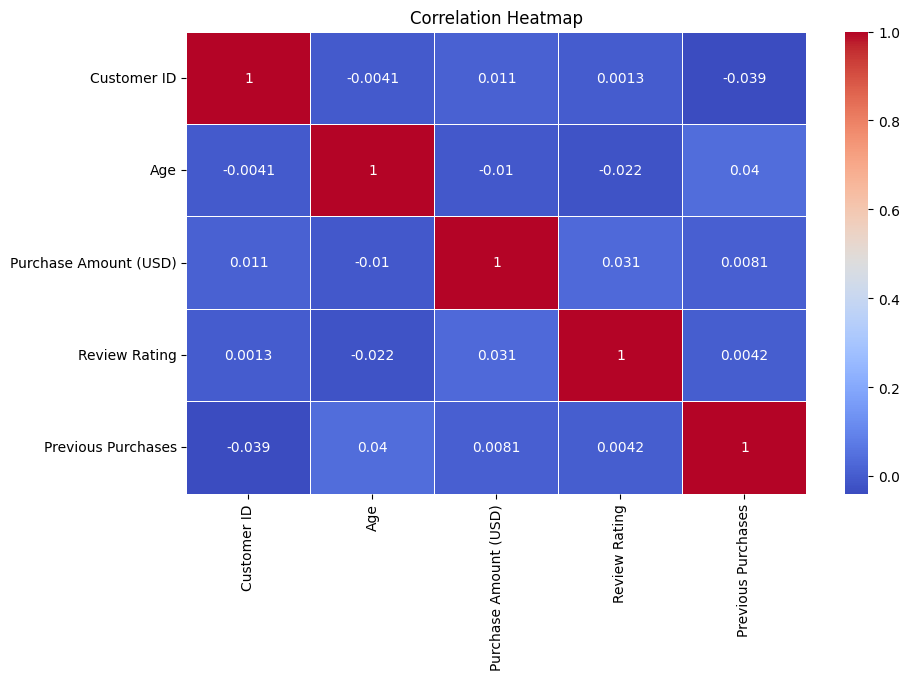

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(shopping[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

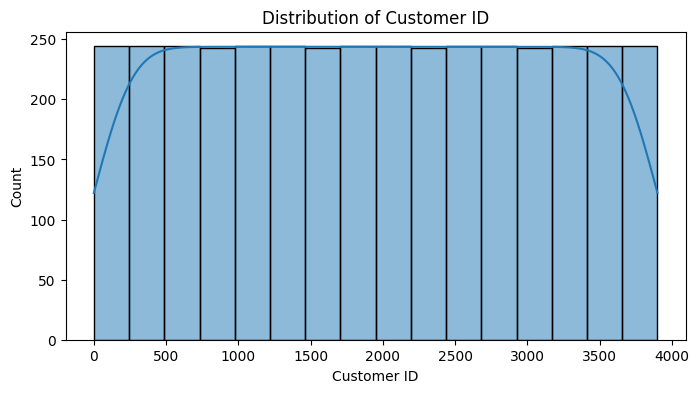

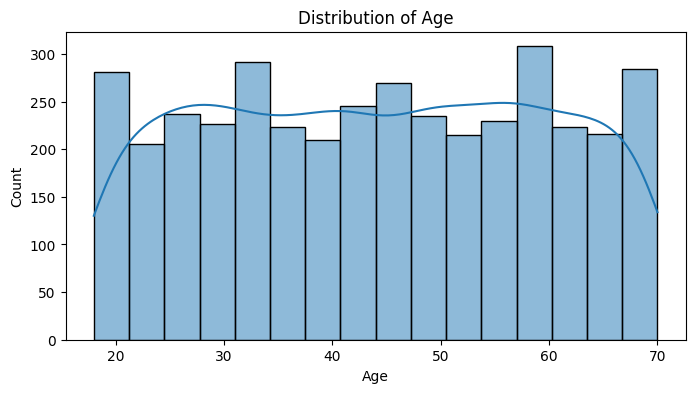

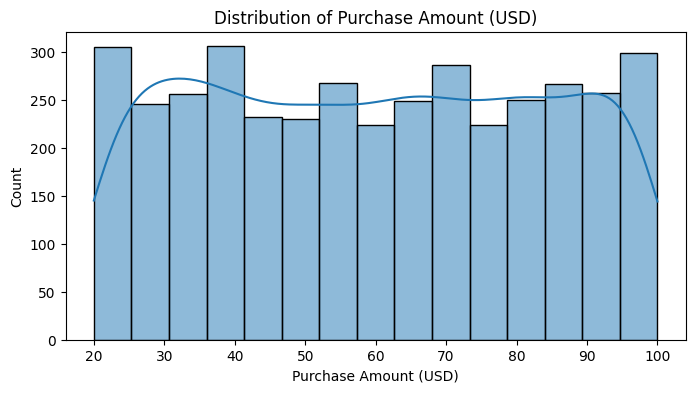

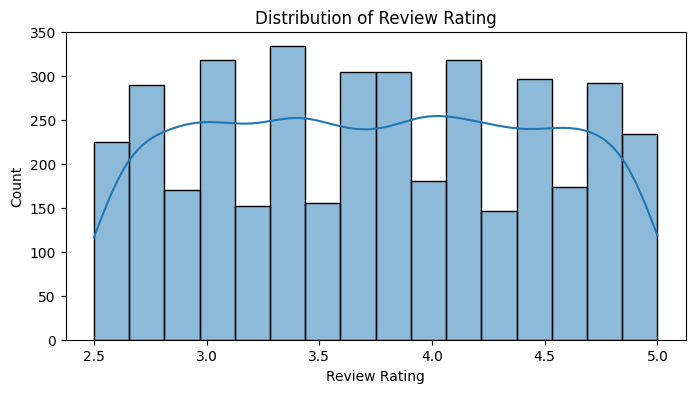

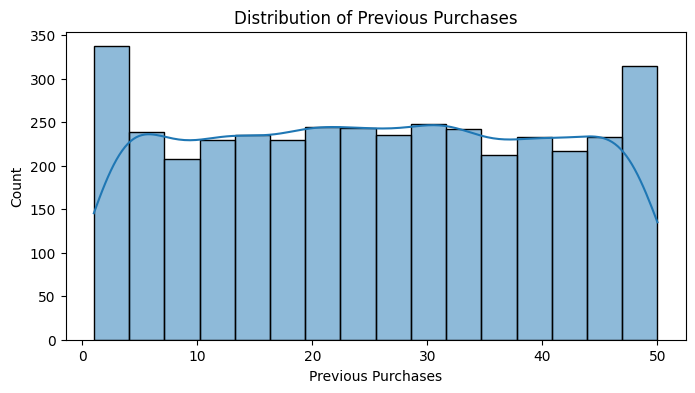

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(shopping[col], kde=True)
    plt.title(f"Distribution of {col}")
    # plt.ylabel(f"{col.capitalize()}")
    plt.show()

In [12]:
print("Numeric:", list(numeric_cols))
print("Categorical:", list(categorical_cols))

Numeric: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Categorical: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


In [13]:
(shopping.groupby(["Category", "Season"])['Purchase Amount (USD)'].agg(['mean', 'min', 'max', 'std']))

mean  min  max        std
Category    Season                                
Accessories Fall    61.339506   20  100  23.566299
            Spring  56.501661   20   99  23.601924
            Summer  60.987179   20  100  22.590721
            Winter  60.366337   20  100  23.226379
Clothing    Fall    61.405152   20  100  24.263562
            Spring  60.995595   20  100  24.059528
            Summer  56.563725   20  100  23.440045
            Winter  60.879464   20  100  23.153099
Footwear    Fall    63.713235   21  100  23.144924
            Spring  58.619632   21   99  22.730631
            Summer  58.706250   20  100  24.029488
            Winter  60.571429   20  100  24.562105
Outerwear   Fall    59.761364   22  100  22.926166
            Spring  54.629630   20  100  25.872014
            Summer  57.040000   21  100  25.406128
            Winter  57.025000   20  100  24.430203

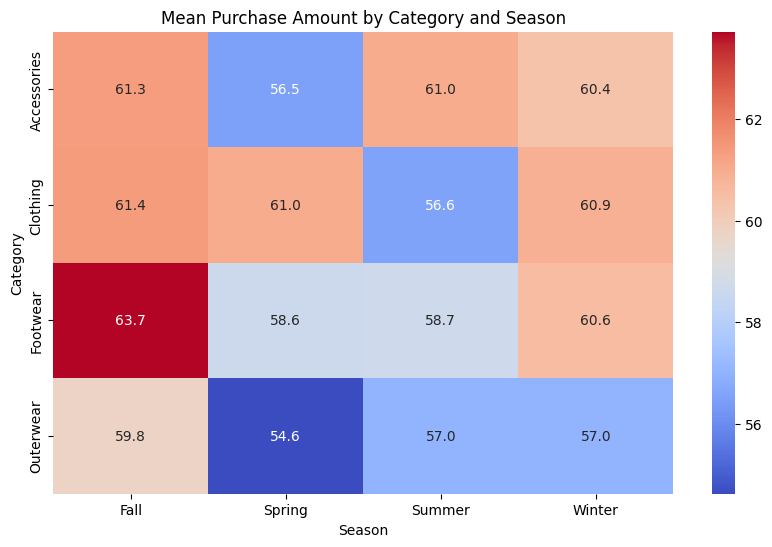

In [15]:
grouped = (
    shopping.groupby(["Category", "Season"])['Purchase Amount (USD)'] \
        .agg(['mean', 'min', 'max', 'std']).reset_index()
)

pivot_mean = grouped.pivot(index="Category", columns='Season', values='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_mean, annot=True, fmt='.1f', cmap="coolwarm")
plt.title("Mean Purchase Amount by Category and Season")
plt.show()

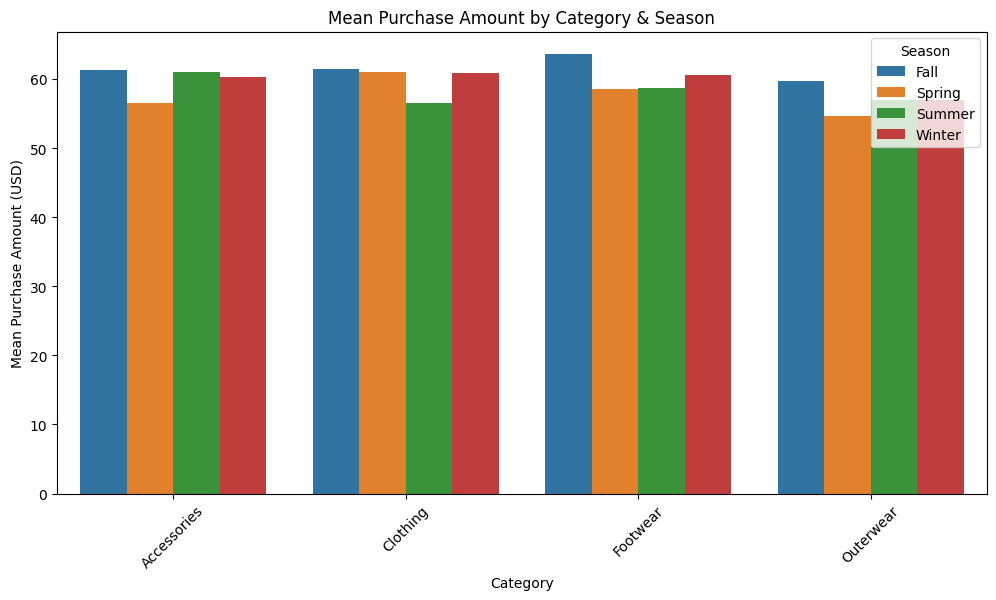

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Category', y='mean', hue='Season')
plt.title("Mean Purchase Amount by Category & Season")
plt.ylabel("Mean Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()

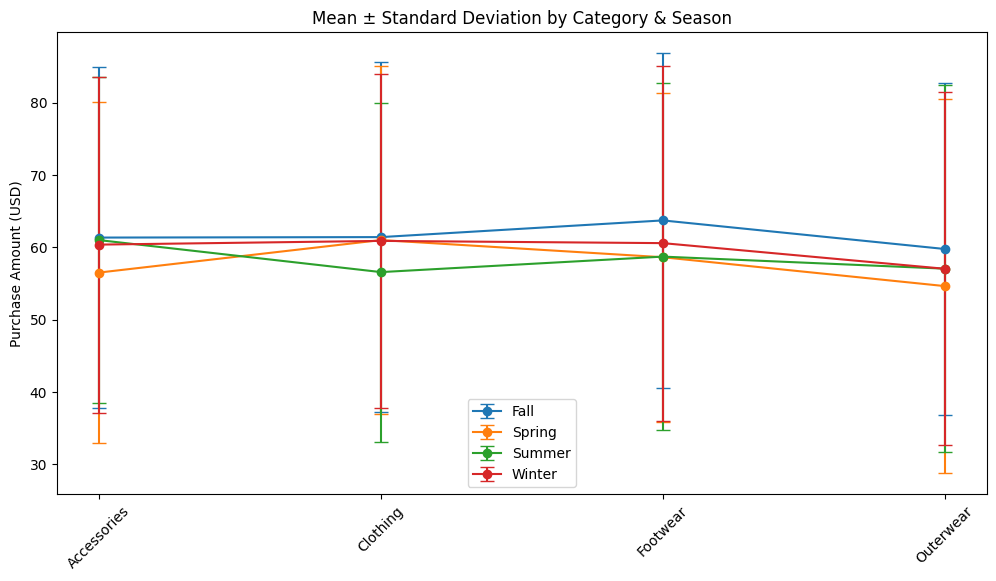

In [17]:
plt.figure(figsize=(12, 6))

for season in grouped['Season'].unique():
    temp = grouped[grouped['Season'] == season]
    plt.errorbar(temp['Category'], temp['mean'], yerr=temp['std'], 
                 fmt='o-', capsize=5, label=season)

plt.title("Mean ± Standard Deviation by Category & Season")
plt.ylabel("Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

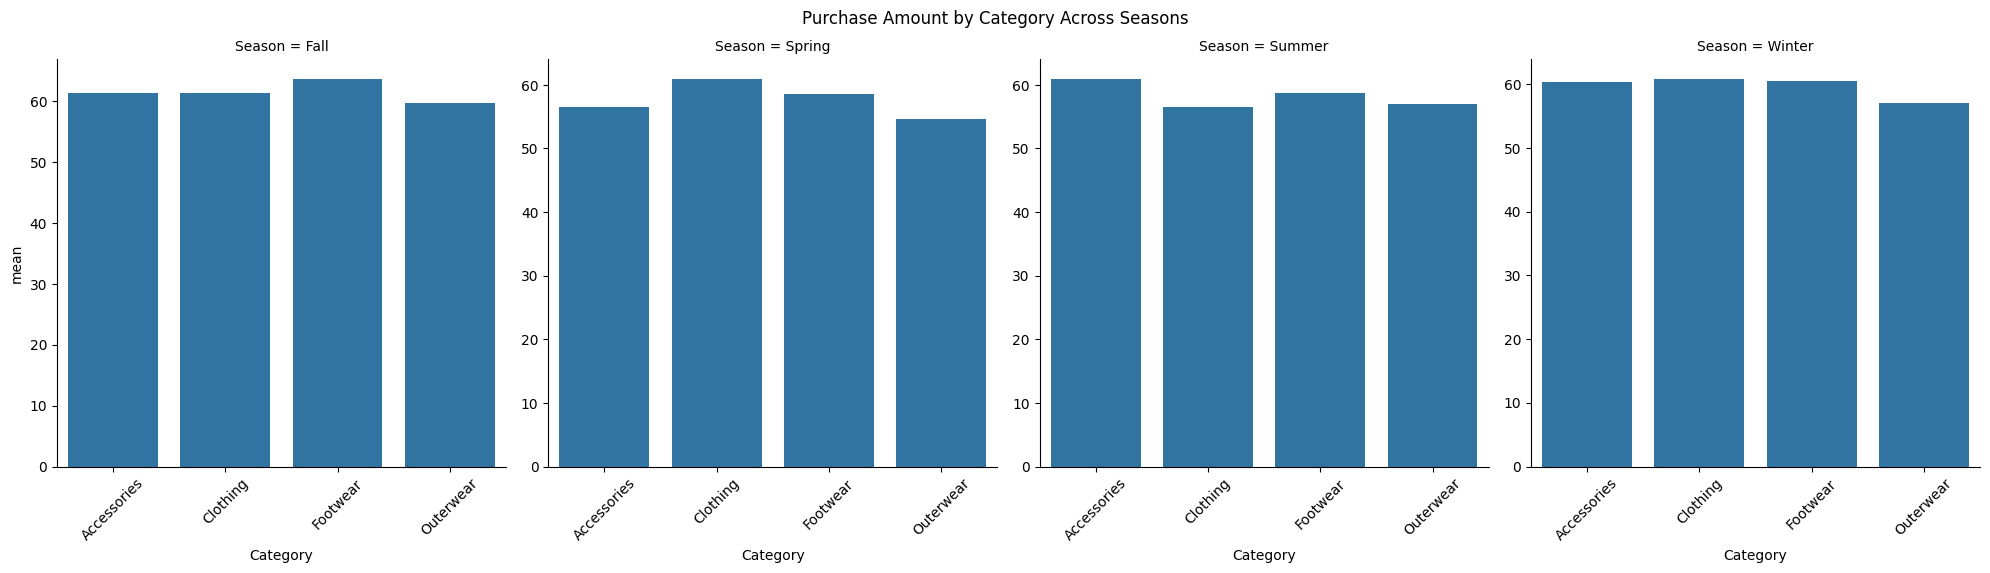

In [18]:
g = sns.FacetGrid(grouped, col="Season", height=5, sharey=False)
g.map_dataframe(sns.barplot, x="Category", y="mean")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Purchase Amount by Category Across Seasons", y=1.03)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def generate_analytics(data: pd.DataFrame) -> pd.DataFrame:
    # Analyze purchase volatility by category and season
    # Challenge1: Group by 'Category' and 'Season'
    df = data.copy()
    volatility = data.groupby(["Category", "Season"])
    # Challenge2: Calculate standard deviation of 'Purchase Amount (USD)'
    volatiliy = volatility['Purchase Amount'].agg('std')
    result = volatility.reset_index().rename(columns={"Purchase Amount (USD)": "Purchase_Amount_Std"})
    return result
